The EPA's current 24 hour standard for PM 2.5 is 35 µg/m3. Levels above this exceed the standard.

In [154]:
import numpy as np
import pandas as pd

pm0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_1999.csv') #read in PM2.5 data for 1999

In [155]:
print(pm0.info()) #provides basic information on data
print(pm0.ndim) #provides dimensions
print(pm0.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103210 entries, 0 to 103209
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           103210 non-null  int64  
 1   County Code          103210 non-null  int64  
 2   Site Num             103210 non-null  int64  
 3   Parameter Code       103210 non-null  int64  
 4   POC                  103210 non-null  int64  
 5   Latitude             103210 non-null  float64
 6   Longitude            103210 non-null  float64
 7   Datum                103210 non-null  object 
 8   Parameter Name       103210 non-null  object 
 9   Sample Duration      103210 non-null  object 
 10  Pollutant Standard   103210 non-null  object 
 11  Date Local           103210 non-null  object 
 12  Units of Measure     103210 non-null  object 
 13  Event Type           103210 non-null  object 
 14  Observation Count    103210 non-null  int64  
 15  Observation Perce

In [156]:
#There are 103,210 rows and 29 columns. Because there are so many columns, look at the first five rows and first 10 columns
pm0.iloc[:5, :10]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration
0,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
2,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
3,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
4,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR


In [157]:
#Look at the first five rows and next 9 columns
pm0.iloc[:5, 11:20]

,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
0,1999-01-12,Micrograms/cubic meter (LC),None,1,100.0,8.8,8.8,0,37
1,1999-01-15,Micrograms/cubic meter (LC),None,1,100.0,14.9,14.9,0,57
2,1999-01-18,Micrograms/cubic meter (LC),None,1,100.0,3.8,3.8,0,16
3,1999-01-21,Micrograms/cubic meter (LC),None,1,100.0,9.0,9.0,0,38
4,1999-01-24,Micrograms/cubic meter (LC),None,1,100.0,5.4,5.4,0,23


In [158]:
#Look at the first five rows and the final columns
pm0.iloc[:5, 21:]

,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
1,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
2,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
3,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
4,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11


In [159]:
#The column of interest is the Arithmetic Mean. Extract that column and print a brief summary
x0 = pm0['Arithmetic Mean']
x0.describe()

count    103210.000000
mean         13.776391
std           9.425582
min           0.000000
25%           7.200000
50%          11.500000
75%          17.900000
max         157.100000
Name: Arithmetic Mean, dtype: float64

Compare results of data and summary with Data Analysis Case Study: Changes in Fine Particle Air Pollution in the U.S.

Dr. Peng used raw text files from the EPA. The 1999 PM2.5 dataset had 117,421 rows. The dataset parameters were also
slightly different. The parameter used for analysis was Sample Value. 
"The sample value is the average atmospheric concentration of the parameter in the time window beginning at the sample
begin time and lasting for the sample duration." 
Source:https://aqs.epa.gov/aqsweb/documents/about_aqs_data.html#_the_aqs_data_set <br>
No cleaning of data was described. <br>

summary(x0) for Dr. Peng's 1999 Sample Value  <br>
Min.     0.00  <br>
1st Qu.  7.20  <br>
Median  11.50  <br>
Mean    13.74  <br>
3rd Qu. 17.90  <br>
Max.   157.10  <br>
NA's    13217  <br>

My dataset was a csv file of data summarized on a daily basis. This 1999 PM2.5 dataset had 103,210 rows. 
There were no NA values. The number of NA values in Dr. Peng's raw text file (13,217) combined with the number of rows
in the summarized dataset that I used is 116,427.  According to the EPA AQS website: "historical monitoring or 
calculation methods may be found to be problematic and require that older data be changed." The number of observations
between these two datasets differed by 994 after adjusting for removed NA rows. It's not unreasonable to assume 
those 994 observations were also removed from the summarized file.
No cleaning of data was performed by me.

The summary(x0) for my 1999 Arithmetic Mean (see cell directly above) closely matches Dr. Peng's 1999 Sample Value, with the exception there are no NA values in my dataset.


In [160]:
pm1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2012.csv') #read in PM2.5 data for 2012

In [161]:
print(pm1.info())
print(pm1.ndim) 
print(pm1.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276671 entries, 0 to 276670
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           276671 non-null  int64  
 1   County Code          276671 non-null  int64  
 2   Site Num             276671 non-null  int64  
 3   Parameter Code       276671 non-null  int64  
 4   POC                  276671 non-null  int64  
 5   Latitude             276671 non-null  float64
 6   Longitude            276671 non-null  float64
 7   Datum                276671 non-null  object 
 8   Parameter Name       276671 non-null  object 
 9   Sample Duration      276671 non-null  object 
 10  Pollutant Standard   191001 non-null  object 
 11  Date Local           276671 non-null  object 
 12  Units of Measure     276671 non-null  object 
 13  Event Type           276671 non-null  object 
 14  Observation Count    276671 non-null  int64  
 15  Observation Perce

In [162]:
#Again, the column of interest is the Arithmetic Mean. Extract the column and print a brief summary
x1 = pm1['Arithmetic Mean']
x1.describe() 


count    276671.000000
mean          9.141456
std           6.520117
min          -6.312500
25%           5.100000
50%           7.916667
75%          11.700000
max         236.254167
Name: Arithmetic Mean, dtype: float64

Compare results of data and summary with Data Analysis Case Study: Changes in Fine Particle Air Pollution in the U.S.
    
Dr. Peng used raw text files from the EPA. The 2012 PM2.5 dataset had 1,304,290 rows. The parameter used for analysis 
was Sample Value. Dr. Peng discussed the unusual negative minimum value but made no changes to the dataset. 
He also commented on the very elevated maximum value. No cleaning of data was described.

summary(x0) for Dr. Peng's 2012 Sample Value <br>
Min.   -10.00 <br>
1st Qu.   4.00 <br>
Median    7.63 <br>
Mean      9.14 <br>
3rd Qu.  12.00 <br>
Max.    909.00 <br>
NA's     73133 <br>


The dataset I used was a csv file of data summarized on a daily basis. The 2012 PM2.5 dataset had 276,671 rows. 
There were no NA values. The difference in the number of observations between the raw text file and the summarized csv 
file is 1,027,619. It is unclear why there is such a large discrepancy between the number of observations in the raw text
file and the number of observations in the summarized csv file. No initial cleaning of data was performed by me.  

The summary(x0) for my 2012 Arithmetic Mean does not align as closely to Dr. Peng's as the 1999 comparison did.
The means were exactly the same, though. Interestingly, the minimum value in my summary was also a negative value. 
The maximum value in my summary was 236.25, a more reasonable value than 909. Presumably, the 909 observation row was
removed from the summarized csv file that I used for analysis.

In [163]:
#Look into the number of negative numbers in PM2.5 2012 dataset
countNegativeValues = np.count_nonzero(x1 < 0) #find count of negative values
print(countNegativeValues)
print((countNegativeValues / len(pm1)) * 100) #find percentage of negative values 

1130
0.40842733788506924


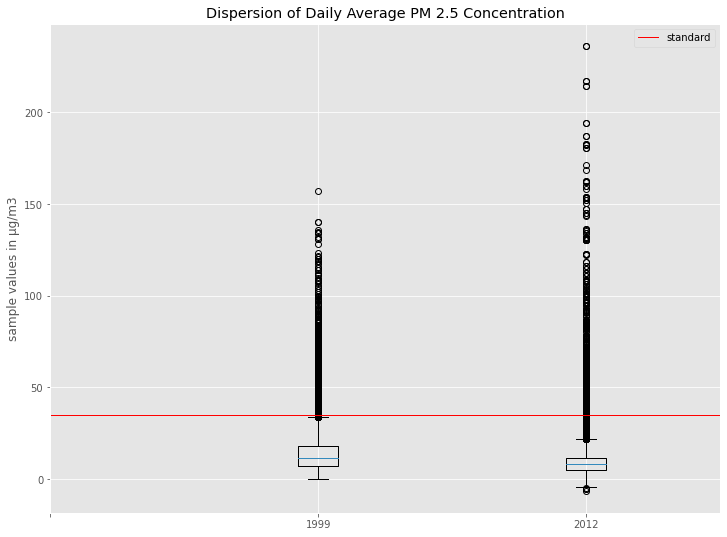

In [164]:
## Compare aggregate changes in PM2.5 for years 1999 and 2012 by making boxplots.
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
fig = plt.figure(figsize = [12, 9]) #make larger

years = [x0, x1]
plt.boxplot(years)
plt.title('Dispersion of Daily Average PM 2.5 Concentration')
plt.xticks(np.arange(3), ['', '1999','2012'])
plt.ylabel('sample values in µg/m3')
plt.axhline(y=35, linewidth=1, color='r', label = 'standard')
plt.legend()

In [165]:
plt.close()

Dr. Peng took the log of the PM 2.5 values to adjust for skew in the data. In R, the code used was 
boxplot(log2(x0), log2(x1)). I was unable to recreate this in python with my data, due to the negative values in my 2012 dataset. Dr. Peng's 2012 dataset also had negative values. In R, taking the log of a negative number results in a NaN value and a warning that something unexpected happened. There isn't an error, though (R Programming, p 132). 

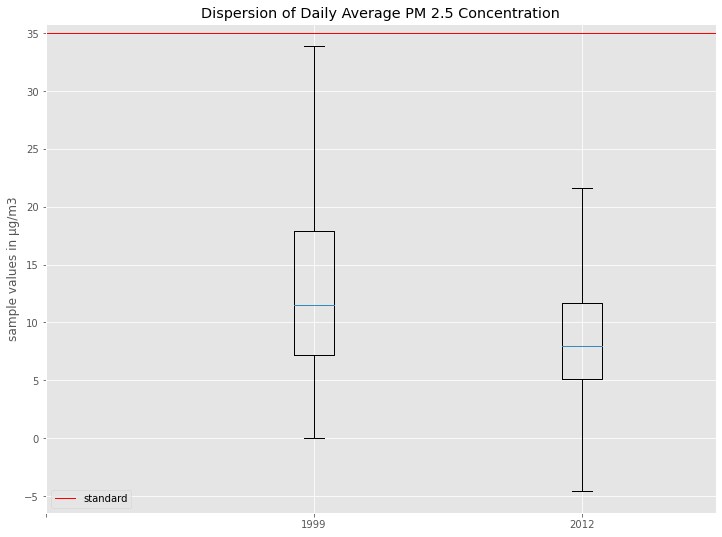

In [166]:
#remove outliers to better visualize differences between 1999 and 2012 datasets
fig = plt.figure(figsize = [12, 9]) #make larger

years = [x0, x1]
plt.boxplot(years, showfliers=False)
plt.title('Dispersion of Daily Average PM 2.5 Concentration')
plt.xticks(np.arange(3), ['', '1999','2012'])
plt.ylabel('sample values in µg/m3')
plt.axhline(y=35, linewidth=1, color='r', label = 'standard')
plt.legend()


In [167]:
plt.close()

In [168]:
pm2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2020.csv') #read in PM2.5 data for 2020

In [169]:
print(pm2.info())
print(pm2.ndim) 
print(pm2.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554830 entries, 0 to 554829
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           554830 non-null  int64  
 1   County Code          554830 non-null  int64  
 2   Site Num             554830 non-null  int64  
 3   Parameter Code       554830 non-null  int64  
 4   POC                  554830 non-null  int64  
 5   Latitude             554830 non-null  float64
 6   Longitude            554830 non-null  float64
 7   Datum                554830 non-null  object 
 8   Parameter Name       554830 non-null  object 
 9   Sample Duration      554830 non-null  object 
 10  Pollutant Standard   311371 non-null  object 
 11  Date Local           554830 non-null  object 
 12  Units of Measure     554830 non-null  object 
 13  Event Type           554830 non-null  object 
 14  Observation Count    554830 non-null  int64  
 15  Observation Perce

In [170]:
#Again, the column of interest is the Arithmetic Mean. Extract the column and print a brief summary
x2 = pm2['Arithmetic Mean']
x2.describe() 

count    554830.000000
mean          8.159036
std          10.625555
min          -5.000000
25%           4.300000
50%           6.500000
75%           9.500000
max         824.104167
Name: Arithmetic Mean, dtype: float64

Unfortunately, this dataset also has negative values. Since values should seemingly <b>not</b> be negative, I contacted the EPA via email to understand the negative values. I received this response: 

"Thanks for your message and reaching out. We have a short write up on acceptable values in EPA's Air Quality System (AQS) here: https://aqs.epa.gov/aqsweb/documents/about_aqs_data.html#_acceptable_values, but since that explanation is very short I can elaborate.

Every instrument has an allowable uncertainty, and occasionally as you've noted monitors can yield small negative hourly values. Say it's +/- 10 ppb for whatever substance. If the instrument reads 100 ppb, that means the real concentration will be somewhere between 90 and 110. If the instrument reads -3 that means the real value can be anywhere between 0 and 7 (negative concentrations not being possible). We allow reporting of the negative values to capture valid, quality assured readings that are valid members of the sample set. With PM2.5 monitors, negative hourly concentrations for PM2.5 down to -4.99 ug/m3 (the default QC range check) are used in computing 24-hour averages so as not to bias that average."

Looking at the datasets more closely: In 1999, all of the reported values were for sample durations of 24 hours.  In 2012, there were sample durations of 1 hour,  24 hours, and 24 hour block averages. The negative values were either 1 hour or 24 hour block averages. Some monitor sites list more than 1 type of sample duration for a given day, which requires cleaning of the datasets. In light of the EPA's response to my inquiry, I will not remove negative values. 



In [387]:
#Look into negative values in the 2020 dataset
pm2LessThan0 = pm2[pm2['Arithmetic Mean'] < 0]
pm2LessThan0.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
3809,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
3816,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4163,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4170,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
5564,2,110,4,88101,3,58.388497,-134.567237,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Floyd Dryden Middle School,3800 MENDENHALL LOOP ROAD,Alaska,Juneau,Juneau,"Juneau, AK",2021-03-18


It appears that the negative values occur in sample durations of either 1 hour or 24-HR BLK AVG. Look more closely at sample durations.

In [172]:
print(pm2LessThan0.groupby('Sample Duration').size())

Sample Duration
1 HOUR           1481
24-HR BLK AVG    1274
dtype: int64


In [173]:
#Look at overall sample durations for the 2020 dataset
pm2SampleDurations = pm2.groupby('Sample Duration').size()
pm2SampleDurations

Sample Duration
1 HOUR           243459
24 HOUR           72055
24-HR BLK AVG    239316
dtype: int64

In [174]:
#Look into sample durations for the 2012 dataset
pm1LessThan0 = pm1[pm1['Arithmetic Mean'] < 0]

In [175]:
print(pm1LessThan0.groupby('Sample Duration').size())
#print(pm1LessThan0.info())

Sample Duration
1 HOUR           606
24-HR BLK AVG    524
dtype: int64


In [176]:
#Look at overall sample durations for the 2012 dataset
pm1SampleDurations = pm1.groupby('Sample Duration').size()
pm1SampleDurations

Sample Duration
1 HOUR            85670
24 HOUR          107843
24-HR BLK AVG     83158
dtype: int64

In [177]:
#Look into sample durations for the 1999 dataset
pm0SampleDurations = pm0.groupby('Sample Duration').size()
pm0SampleDurations

Sample Duration
24 HOUR    103210
dtype: int64

All samples in the 1999 dataset are 24 hour samples. In the 2012 dataset and 2020 dataset, there are 1 hour samples, 24 hour samples, and 24-hr blk avg samples. The negative values in the 2012 and 2020 datasets are either 1 hour samples or 24-hour blk average samples.


In [178]:
#Show bar chart of types of sample durations in 1999, 2012, and 2020
concatenatedSampleDurations = pd.concat([pm0SampleDurations, pm1SampleDurations, pm2SampleDurations], axis = 1, keys = ['1999', '2012', '2020'])
concatenatedSampleDurations

,1999,2012,2020
Sample Duration,,,
24 HOUR,103210.0,107843,72055
1 HOUR,NaN,85670,243459
24-HR BLK AVG,NaN,83158,239316


In [179]:
transposedSampleDurations = concatenatedSampleDurations.transpose()
transposedSampleDurations

Sample Duration,24 HOUR,1 HOUR,24-HR BLK AVG
1999,103210.0,NaN,NaN
2012,107843.0,85670.0,83158.0
2020,72055.0,243459.0,239316.0


Text(0.5, 1.0, 'PM 2.5 Sample Durations by Dataset')

<Figure size 864x648 with 0 Axes>

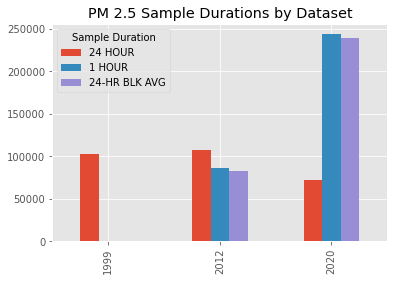

In [236]:
fig = plt.figure(figsize = [12, 9]) #make larger
#transposedSampleDurations.plot(kind = 'bar', stacked=True)
transposedSampleDurations.plot(kind = 'bar')
plt.title('PM 2.5 Sample Durations by Dataset')

In [181]:
plt.close()


It is clear that the trend is moving away from reporting of 24 hour samples only. Particularly in 2020, the number of 24 hour samples is far smaller than the number of 1 hour and 24-hour block average samples. Looking at the csv files, sites routinely had both 1 hour samples and 24-hr block averages on the same day. Cleaning of 2012 and 2020 datasets will include (1) removal of 1 hour samples, (2) removal of excluded event observations, (3) removal of 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date.

In [388]:
#remove 1 hour samples from 2012 dataset
pm1Non1HR = pm1[pm1['Sample Duration'] !=  '1 HOUR']
pm1Non1HR.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07


In [389]:
#remove excluded observations
pm1Non1HrNonExcluded = pm1Non1HR[pm1Non1HR['Event Type'] !=  'Excluded']
pm1Non1HrNonExcluded.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07


In [390]:
pm1Non1HrNonExcludedSorted = pm1Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])
pm1Non1HrNonExcludedSorted.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07


In [391]:
pm1Cleaned = pm1Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'],
            keep='first')
pm1Cleaned.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07


In [186]:
pm1Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2012_cleaned.csv', header = True)

In [187]:
x1Cleaned = pm1Cleaned['Arithmetic Mean']
x1Cleaned.describe()

count    165133.000000
mean          9.078237
std           6.255141
min          -3.500000
25%           5.200000
50%           7.900000
75%          11.600000
max         236.200000
Name: Arithmetic Mean, dtype: float64

In [188]:
#repeat cleaning process for 2020 dataset
#remove 1 hour samples from 2020 dataset
pm2Non1HR = pm2[pm2['Sample Duration'] !=  '1 HOUR']

In [189]:
#remove excluded observations
pm2Non1HrNonExcluded = pm2Non1HR[pm2Non1HR['Event Type'] !=  'Excluded']

In [190]:
#sort by state, county, site number, and date
pm2Non1HrNonExcludedSorted = pm2Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])

In [191]:
#where duplicate dates occur for a given state code, county code, and site number, keep the first observation (24 hour)
pm2Cleaned = pm2Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'], keep='first')

In [192]:
#save cleaned csv
pm2Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2020_cleaned.csv', header = True)

In [193]:
#extract arithmetic mean column from cleaned 2020 dataset
x2Cleaned = pm2Cleaned['Arithmetic Mean']
x2Cleaned.describe()

count    263391.000000
mean          8.101995
std          10.728851
min          -4.900000
25%           4.300000
50%           6.500000
75%           9.400000
max         824.100000
Name: Arithmetic Mean, dtype: float64

Text(0, 0.5, 'sample values in µg/m3')

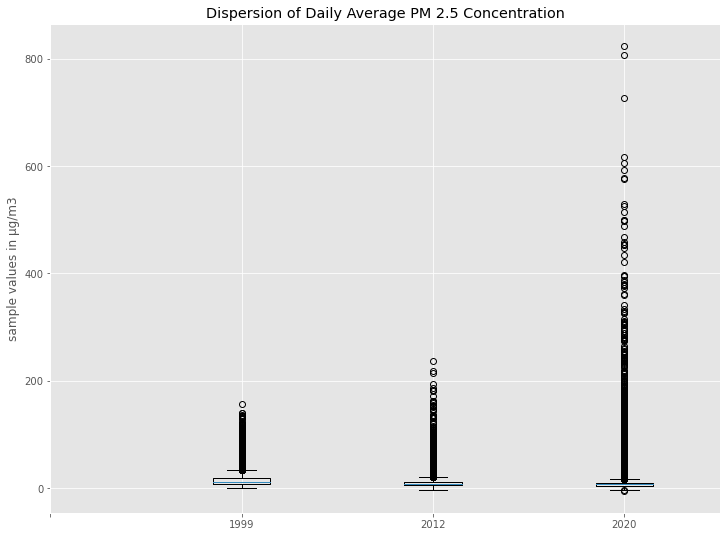

In [194]:
#re-plot arithmetic means for 1999, 2012, and 2020
fig2 = plt.figure(figsize = [12, 9]) #make larger

years = [x0, x1Cleaned, x2Cleaned]
plt.boxplot(years)
plt.title('Dispersion of Daily Average PM 2.5 Concentration')
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values in µg/m3')

In [195]:
plt.close()

Text(0, 0.5, 'sample values in µg/m3')

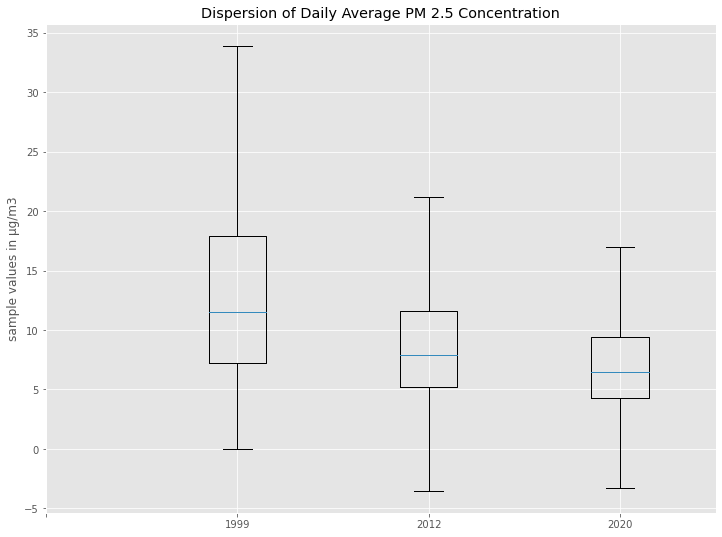

In [196]:
#re-plot arithmetic means for 1999, 2012, and 2020 removing the outliers
fig3 = plt.figure(figsize = [12, 9]) #make larger

years = [x0, x1Cleaned, x2Cleaned]
plt.boxplot(years, showfliers = False)
plt.title('Dispersion of Daily Average PM 2.5 Concentration')
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values in µg/m3')

In [197]:
plt.close()

## How have state levels of PM 2.5 changed over time?

In [198]:
#calculate the PM for each state in 1999, 2012, and 2020
#mn0 <- with(pm0, tapply(Sample.Value, State.Code, mean, na.rm = TRUE))
#df10['Mileage'].groupby(df10['Model']).mean()
mn0 = pm0['Arithmetic Mean'].groupby(pm0['State Code']).mean()
mn1 = pm1Cleaned['Arithmetic Mean'].groupby(pm1Cleaned['State Code']).mean()
mn2 = pm2Cleaned['Arithmetic Mean'].groupby(pm2Cleaned['State Code']).mean()
#mn2.head(5)

In [201]:
#Make separate data frames for states / years
#d0 <- data.frame(state = names(mn0), mean = mn0)
#d1 <- data.frame(state = names(mn1), mean = mn1)
#mrg <- merge(d0, d1, by = "state")
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d0.rename(columns = {'State Code' : 'State', 'Arithmetic Mean' : 'Mean'}, inplace = True)
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d1.rename(columns = {'State Code' : 'State', 'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg = pd.merge(d0, d1, on = 'State')
#mrg.head(10)

[Text(1, 0, '1999'), Text(3, 0, '2012')]

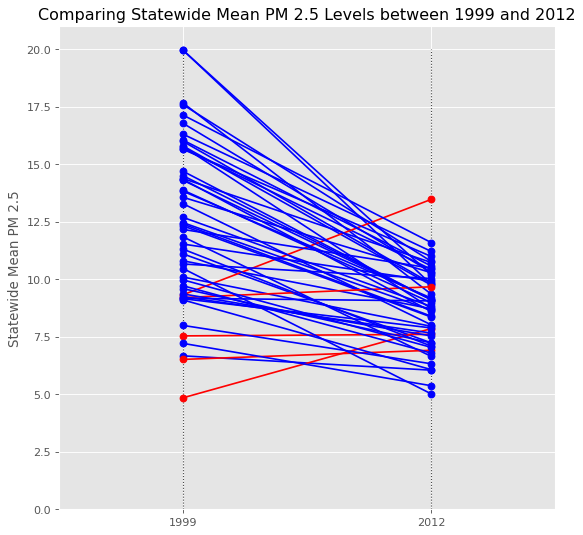

In [228]:
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
#ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['Mean_x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['Mean_y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(mrg['Mean_x'], mrg['Mean_y'], mrg['State']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title("Comparing Statewide Mean PM 2.5 Levels between 1999 and 2012")
ax.set(xlim=(0,4), ylim=(0,21), ylabel='Statewide Mean PM 2.5')
ax.set_xticks([1,3])
ax.set_xticklabels(["1999", "2012"])

In [ ]:
plt.close()

In [214]:
#Add 2020 dataset and re-plot changes between 2012 and 2020
d2 = pd.DataFrame(mn2.to_frame().reset_index())
d2.rename(columns = {'State Code' : 'State', 'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg1 = pd.merge(mrg, d2, on = 'State')
mrg1.head(5)

,State,Mean_x,Mean_y,Mean
0,1,19.951238,9.774805,8.247639
1,2,6.665929,6.043637,6.995130
2,4,10.795547,8.713038,8.575415
3,5,15.676067,10.427459,7.848161
4,6,17.653481,9.351435,12.364399


[Text(1, 0, '2012'), Text(3, 0, '2020')]

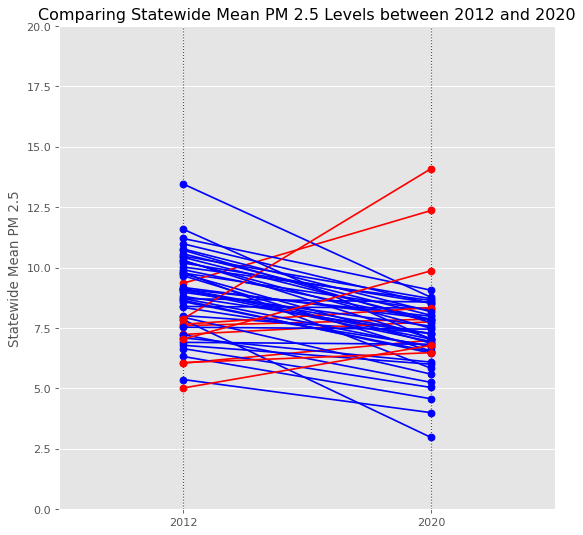

In [227]:
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
#ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
#ax.vlines(x=5, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')


# Points
#ax.scatter(y=mrg1['Mean_x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean_y'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip( mrg1['Mean_y'], mrg1['Mean'], mrg1['State']):
    newline([1,p1], [3,p2] )
    
# Decoration
ax.set_title("Comparing Statewide Mean PM 2.5 Levels between 2012 and 2020")
ax.set(xlim=(0,4), ylim=(0,20), ylabel='Statewide Mean PM 2.5')
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2020'])

In [366]:
plt.close()

## Which states have the highest levels of PM2.5?

In [365]:

#Need a new datafile from AQS on site information
sites = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\aqs_sites.csv')
#print(len(sites))
#print(sites.head(5))
#print(sites.info())
#d0

#print(type(d0))

#print(d0.info())
sitesSubset = sites[['State Code', 'State Name']]
sitesStateNames = sitesSubset['State Name'].unique()
sitesStateNames
#remove 'Country Of Mexico' and 'Canada' but leave in Guam, Puerto Rico, and Virgin Islands
cleanedSitesStateNames = np.delete(sitesStateNames, [-2, -1]) #by index
cleanedSitesStateNames

sitesStateCodes = sitesSubset['State Code'].unique()
sitesStateCodes
#remove the last two elements that correspond with Mexico and Canada
cleanedSitesStateCodes = np.delete(sitesStateCodes, [-2, -1]) #by index
cleanedSitesStateCodes

cleanedSites = pd.DataFrame(data = [cleanedSitesStateNames, cleanedSitesStateCodes]).T
cleanedSites.columns = ['State Name', 'State Code']
cleanedSites


cleanedSites['State Code'] = cleanedSites['State Code'].astype(int)
cleanedSites
print(cleanedSites.info())
print(cleanedSites)


d0.info()
d0 = d0.rename(columns = {'State' : 'State Code'})
d0['State Code'] = d0['State Code'].astype(int)
d0
print(d0.info())
print(d0)

#d0merged = d0.join(cleanedSites, on='State Code')
#df_a.merge(df_b, on='mukey', how='left')
d0merged = d0.merge(cleanedSites, on='State Code', how = 'left')
d0merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Name  54 non-null     object
 1   State Code  54 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 776.0+ bytes
None
              State Name  State Code
0                Alabama           1
1                 Alaska           2
2                Arizona           4
3               Arkansas           5
4             California           6
5               Colorado           8
6            Connecticut           9
7               Delaware          10
8   District Of Columbia          11
9                Florida          12
10               Georgia          13
11                Hawaii          15
12                 Idaho          16
13              Illinois          17
14               Indiana          18
15                  Iowa          19
16                Kansas          20
17          

,State Code,Mean,State Name
0,1,19.951238,Alabama
1,2,6.665929,Alaska
2,4,10.795547,Arizona
3,5,15.676067,Arkansas
4,6,17.653481,California
5,8,7.533304,Colorado
6,9,13.276085,Connecticut
7,10,14.492895,Delaware
8,11,15.786507,District Of Columbia
9,12,11.095627,Florida


In [379]:
d0TopTen = d0merged.sort_values('Mean', ascending = False).head(10)
d0TopTen

,State Code,Mean,State Name
0,1,19.951238,Alabama
10,13,19.943240,Georgia
4,6,17.653481,California
34,39,17.578823,Ohio
41,47,17.129217,Tennessee
47,54,16.769652,West Virginia
13,17,16.724550,Illinois
23,28,16.297349,Mississippi
17,21,16.039906,Kentucky
19,24,15.985083,Maryland


[Text(0.5, 0, 'Mean concentrations (µg/m3)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '1999 Highest Concentrations of PM 2.5')]

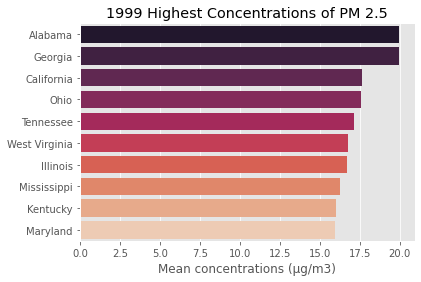

In [380]:
import seaborn as sns
ax = sns.barplot(x = d0TopTen['Mean'], y = d0TopTen['State Name'], palette = 'rocket')
ax.set(xlabel = 'Mean concentrations (µg/m3)', ylabel = '', title='1999 Highest Concentrations of PM 2.5')

In [381]:
plt.close()

In [347]:
#repeat top ten visualizations for years 2012 and 2020
d1 = d1.rename(columns = {'State' : 'State Code'})
d1['State Code'] = d1['State Code'].astype(int)
d1merged = d1.merge(cleanedSites, on='State Code', how = 'left')
d1merged

,State Code,Mean,State Name
0,1,9.774805,Alabama
1,2,6.043637,Alaska
2,4,8.713038,Arizona
3,5,10.427459,Arkansas
4,6,9.351435,California
5,8,7.599202,Colorado
6,9,8.015652,Connecticut
7,10,9.114147,Delaware
8,11,9.743758,District Of Columbia
9,12,7.233325,Florida


In [350]:
d1merged
d1TopTen = d1merged.sort_values('Mean', ascending = False).head(10)
d1TopTen

,State Code,Mean,State Name
12,16,13.464291,Idaho
40,47,11.590931,Tennessee
22,28,11.207692,Mississippi
13,18,10.987102,Indiana
33,39,10.775360,Ohio
36,42,10.724850,Pennsylvania
16,21,10.573842,Kentucky
41,48,10.477064,Texas
3,5,10.427459,Arkansas
46,54,10.301948,West Virginia


[Text(0.5, 0, 'Mean concentrations (µg/m3)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '2012 Highest Concentrations of PM 2.5')]

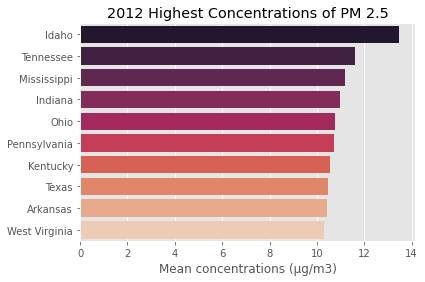

In [382]:
ax = sns.barplot(x = d1TopTen['Mean'], y = d1TopTen['State Name'], palette = 'rocket')
ax.set(xlabel = 'Mean concentrations (µg/m3)', ylabel = '', title='2012 Highest Concentrations of PM 2.5')

In [352]:
plt.close

<function matplotlib.pyplot.close(fig=None)>

In [353]:
d2 = d2.rename(columns = {'State' : 'State Code'})
d2['State Code'] = d2['State Code'].astype(int)
d2merged = d2.merge(cleanedSites, on='State Code', how = 'left')
d2merged

,State Code,Mean,State Name
0,1,8.247639,Alabama
1,2,6.995130,Alaska
2,4,8.575415,Arizona
3,5,7.848161,Arkansas
4,6,12.364399,California
5,8,7.866625,Colorado
6,9,7.293065,Connecticut
7,10,7.038005,Delaware
8,11,6.868605,District Of Columbia
9,12,7.759254,Florida


In [354]:
d2TopTen = d2merged.sort_values('Mean', ascending = False).head(10)
d2TopTen

,State Code,Mean,State Name
53,80,34.840556,NaN
37,41,14.096686,Oregon
4,6,12.364399,California
47,53,9.867813,Washington
24,28,9.063922,Mississippi
12,16,8.768651,Idaho
43,48,8.712135,Texas
36,40,8.639519,Oklahoma
13,17,8.626991,Illinois
2,4,8.575415,Arizona


In [358]:
#The state code of 80 is for the country of Mexico. Need to remove all data from 2020 
#dataset that has a state code of 80. Will need to re-do all 2020 plots as well.
pm2Cleaned.columns
pm2.info()
pm2ReCleaned = pm2Cleaned[pm2['State Code'] != 80]
pm2ReCleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554830 entries, 0 to 554829
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           554830 non-null  int64  
 1   County Code          554830 non-null  int64  
 2   Site Num             554830 non-null  int64  
 3   Parameter Code       554830 non-null  int64  
 4   POC                  554830 non-null  int64  
 5   Latitude             554830 non-null  float64
 6   Longitude            554830 non-null  float64
 7   Datum                554830 non-null  object 
 8   Parameter Name       554830 non-null  object 
 9   Sample Duration      554830 non-null  object 
 10  Pollutant Standard   311371 non-null  object 
 11  Date Local           554830 non-null  object 
 12  Units of Measure     554830 non-null  object 
 13  Event Type           554830 non-null  object 
 14  Observation Count    554830 non-null  int64  
 15  Observation Perce

<ipython-input-358-4c170ad1de2b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pm2ReCleaned = pm2Cleaned[pm2['State Code'] != 80]


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,48.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,13.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,14.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,39.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554279,78,30,10,88101,1,18.343811,-64.931389,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,17.0,NaN,-,NaN,# 8 Tolbod Gade,Virgin Islands,St Thomas,Charlotte Amalie,NaN,2021-02-03
554280,78,30,10,88101,1,18.343811,-64.931389,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,17.0,NaN,-,NaN,# 8 Tolbod Gade,Virgin Islands,St Thomas,Charlotte Amalie,NaN,2021-02-03
554281,78,30,10,88101,1,18.343811,-64.931389,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,21.0,NaN,-,NaN,# 8 Tolbod Gade,Virgin Islands,St Thomas,Charlotte Amalie,NaN,2021-02-03
554282,78,30,10,88101,1,18.343811,-64.931389,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,23.0,NaN,-,NaN,# 8 Tolbod Gade,Virgin Islands,St Thomas,Charlotte Amalie,NaN,2021-02-03


In [360]:
#mn2 = pm2Cleaned['Arithmetic Mean'].groupby(pm2Cleaned['State Code']).mean()
mn2Updated = pm2ReCleaned['Arithmetic Mean'].groupby(pm2ReCleaned['State Code']).mean()
d2Updated = pd.DataFrame(mn2Updated.to_frame().reset_index())
d2Updated.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)

In [361]:
d2Updated['State Code'] = d2Updated['State Code'].astype(int)
d2Updatedmerged = d2Updated.merge(cleanedSites, on='State Code', how = 'left')
d2Updatedmerged
d2UpdatedTopTen = d2Updatedmerged.sort_values('Mean', ascending = False).head(10)
d2UpdatedTopTen

,State Code,Mean,State Name
37,41,14.096686,Oregon
4,6,12.364399,California
47,53,9.867813,Washington
24,28,9.063922,Mississippi
12,16,8.768651,Idaho
43,48,8.712135,Texas
36,40,8.639519,Oklahoma
13,17,8.626991,Illinois
2,4,8.575415,Arizona
10,13,8.529172,Georgia


[Text(0.5, 0, 'Mean concentrations (µg/m3)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '2020 Highest Concentrations of PM 2.5')]

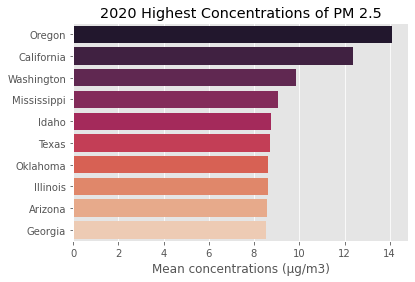

In [383]:
#plot 2020 updated 
ax = sns.barplot(x = d2UpdatedTopTen['Mean'], y = d2UpdatedTopTen['State Name'], palette = 'rocket')
ax.set(xlabel = 'Mean concentrations (µg/m3)', ylabel = '', title='2020 Highest Concentrations of PM 2.5')

In [367]:
plt.close()

## Which states have the lowest levels of PM2.5?

[Text(0.5, 0, 'Mean concentrations (µg/m3)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '1999 Lowest Concentrations of PM 2.5')]

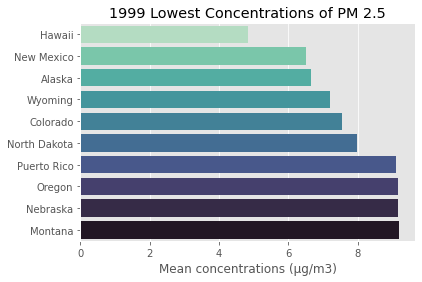

In [384]:
d0LowestTen = d0merged.sort_values('Mean').head(10)
ax = sns.barplot(x = d0LowestTen['Mean'], y = d0LowestTen['State Name'], palette = 'mako_r')
ax.set(xlabel = 'Mean concentrations (µg/m3)', ylabel = '', title='1999 Lowest Concentrations of PM 2.5')

In [370]:
plt.close()

[Text(0.5, 0, 'Mean concentrations (µg/m3)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '1999 Lowest Concentrations of PM 2.5')]

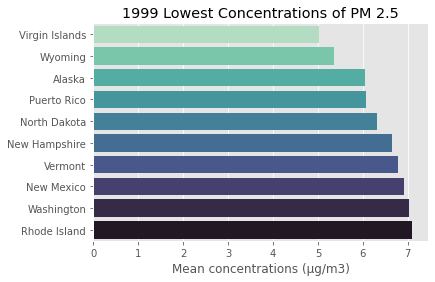

In [376]:
d1LowestTen = d1merged.sort_values('Mean').head(10)
ax = sns.barplot(x = d1LowestTen['Mean'], y = d1LowestTen['State Name'], palette = 'mako_r')
ax.set(xlabel = 'Mean concentrations (µg/m3)', ylabel = '', title='1999 Lowest Concentrations of PM 2.5')

In [377]:
plt.close()

[Text(0.5, 0, 'Mean concentrations (µg/m3)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '2020 Lowest Concentrations of PM 2.5')]

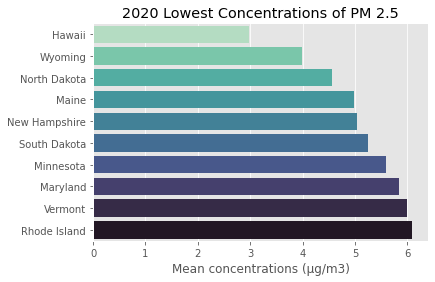

In [385]:
d2LowestTen = d2Updatedmerged.sort_values('Mean').head(10)
ax = sns.barplot(x = d2LowestTen['Mean'], y = d2LowestTen['State Name'], palette = 'mako_r')
ax.set(xlabel = 'Mean concentrations (µg/m3)', ylabel = '', title='2020 Lowest Concentrations of PM 2.5')

In [386]:
plt.close()